<a href="https://colab.research.google.com/github/zahragolpa/terrain-visibility/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import shapely.geometry
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install sympy

In [3]:
class Terrain:
  def __init__(self, vertices, viewpoints):

    # list of vertices of type Point
    self.vertices = sorted(vertices, key=lambda vertices: vertices.x)
    # list of viewpoints of type Point
    self.viewpoints = sorted(viewpoints, key=lambda viewpoints: viewpoints.x)
    # list of vertices of type float
    self.vertices_coords = []
    # list of viewpoints of type float
    self.viewpoints_coords = []
    # merged list of viewpoints and vertices
    self.viewpoints_and_vertices_coords = []
    # list of edges
    self.edges = []
    self.visibles = []
    self.l = []
    self.l_prime= []
    self.pa = None
    self.pb = None
    self.rb = None

    self.initialize_vertices_coords()
    self.initialize_viewpoints_coords()
    self.initialize_edges()
    self.initialize_viewpoints_and_vertices_coords()


  def initialize_vertices_coords(self):
    for vertex in self.vertices:
      self.vertices_coords.append((vertex.x, vertex.y))
      # self.vertices_visibility.append(False)

  def initialize_viewpoints_coords(self):
    for viewpoint in self.viewpoints:
      self.viewpoints_coords.append((viewpoint.x, viewpoint.y))

  def initialize_edges(self):
    for i in range(len(self.vertices_coords) - 1):
      self.edges.append(shapely.geometry.linestring.LineString([(self.vertices_coords[i][0], self.vertices_coords[i][1]), (self.vertices_coords[i + 1][0], self.vertices_coords[i + 1][1])]))
      # self.edges_visibility.append(False)

  def initialize_viewpoints_and_vertices_coords(self):
    self.viewpoints_and_vertices_coords = list(dict.fromkeys(sorted(self.viewpoints_coords + self.vertices_coords)))

In [4]:
class MyPoint:
  def __init__(self, x, y, viewpoint=False, visible=False):
    self.x = x
    self.y = y
    self.viewpoint = viewpoint
    self.visible = visible

In [5]:
def get_vertices_and_viewpoints_from_input():
  vertices = []
  viewpoints = []
  # get terrain vertices and terrain viewpoints from input
  print("Please enter the x- and y-coordinates of all terrain vertices, including the viewpoints. Enter q after the last point.\nexample: 2,3\n")
  while(True):
    inp = input()
    if inp == 'q':
      break
    try:
      vertices.append(shapely.geometry.point.Point(float(inp.split(',')[0]), float(inp.split(',')[1])))
      # vertices.append(MyPoint(float(inp.split(',')[0]), float(inp.split(',')[1])))
    except:
      print("Please use the correct format and try again.")

  print("\nPlease enter the x- and y-coordinates of the viewpoints. Enter q after the last point.\n")
  while(True):
    inp = input()
    if inp == 'q':
      break
    try:
      viewpoints.append(shapely.geometry.point.Point(float(inp.split(',')[0]), float(inp.split(',')[1])))
      # viewpoints.append(MyPoint(float(inp.split(',')[0]), float(inp.split(',')[1])))
    except:
      print("Please use the correct format and try again.")
  return vertices, viewpoints

In [6]:
# get vertices and viewpoints from input. Alternatively, you can manually assign numbers to vertices and viewpoints in Points format
# vertices, viewpoints = get_vertices_and_viewpoints_from_input()
vertices = [shapely.geometry.point.Point(1,5), shapely.geometry.point.Point(2,3), shapely.geometry.point.Point(3,4.5), shapely.geometry.point.Point(4,1),
            shapely.geometry.point.Point(5,2), shapely.geometry.point.Point(7,1), shapely.geometry.point.Point(8,3),
            shapely.geometry.point.Point(10,1), shapely.geometry.point.Point(11,2), shapely.geometry.point.Point(13,2.5),
            shapely.geometry.point.Point(15,2), shapely.geometry.point.Point(18,3.5), shapely.geometry.point.Point(19,3), shapely.geometry.point.Point(20,5)]
viewpoints = [shapely.geometry.point.Point(1,5), shapely.geometry.point.Point(5,2)]

# call initialize terrain and store the terrain in variable 'terrain'
terrain = Terrain(vertices, viewpoints)

In [7]:
# a function to draw the terrain
def draw_terrain(terrain):
  min_x = min(terrain.vertices_coords, key=lambda x: x[0])[0]
  max_x = max(terrain.vertices_coords, key=lambda x: x[0])[0]
  min_y = min(terrain.vertices_coords, key=lambda x: x[1])[1]
  if not (min_x - 1, min_y - 1) in terrain.vertices_coords:
    terrain.vertices_coords.insert(0, (min_x - 1, min_y - 1))
  if not (max_x + 1, min_y - 1) in terrain.vertices_coords:
    terrain.vertices_coords.append((max_x + 1, min_y - 1))
  polygon = shapely.geometry.Polygon(terrain.vertices_coords)
  # fig = plt.figure()
  plt.plot(*polygon.exterior.xy)
  for viewpoint in terrain.viewpoints_coords:
    plt.plot(viewpoint[0],viewpoint[1],'ro')

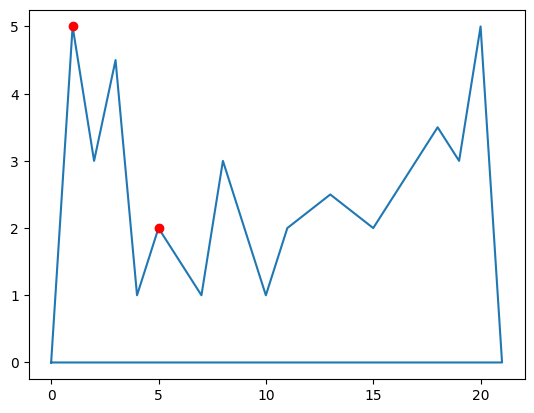

In [8]:
draw_terrain(terrain)

In [9]:
def get_next_point_on_linestring(viewpoint, vertex, wanted_x = 1):
  m = (vertex[1] - viewpoint[1]) / (vertex[0] - viewpoint[0])
  b = -m * vertex[0] + vertex[1]
  x = vertex[0] + wanted_x
  y = m * x + b
  return (x, y)

In [10]:
def isVisibleRightAfter(vertex, viewpoint):
  #print("vertex", vertex)
  #print("viewpoint", viewpoint)
  # question, TODO
  if vertex == viewpoint:
    return True
  vertex_index = terrain.vertices_coords.index(vertex) - 1
  #print("vertex index", vertex_index)
  viewpoint_index = terrain.vertices_coords.index(viewpoint) - 1
  #print("viewpoint_index", viewpoint_index)
  if vertex_index == viewpoint_index + 1:
    return True
  prev_edge = terrain.edges[vertex_index - 1]
  try:
    next_edge = terrain.edges[vertex_index]
  except:
    return
  ray = shapely.geometry.linestring.LineString([viewpoint, vertex])
  temp_triangle = shapely.geometry.polygon.Polygon([prev_edge.coords[0], vertex, next_edge.coords[1]])
  (x, y) = get_next_point_on_linestring(viewpoint, vertex)
  if temp_triangle.intersects(shapely.geometry.point.Point((x, y))):
    return True
  return False

In [11]:
print(terrain.viewpoints_and_vertices_coords)

[(1.0, 5.0), (2.0, 3.0), (3.0, 4.5), (4.0, 1.0), (5.0, 2.0), (7.0, 1.0), (8.0, 3.0), (10.0, 1.0), (11.0, 2.0), (13.0, 2.5), (15.0, 2.0), (18.0, 3.5), (19.0, 3.0), (20.0, 5.0)]


In [12]:
def get_left_intersection(ray_list, edge):

  right_most_x_in_terrain = terrain.vertices_coords[-1][0]
  ray_list_extended = []
  # print(ray_list)
  for ray in ray_list:
    # print(ray)
    (x, y) = get_next_point_on_linestring((ray.coords[0][0], ray.coords[0][1]), (ray.coords[1][0], ray.coords[1][1]), right_most_x_in_terrain)
    temp = shapely.geometry.linestring.LineString([(ray.coords[0][0], ray.coords[0][1]), (x, y)])
    ray_list_extended.append(temp)

  intersections_with_edge = []
  for l in ray_list_extended:
    if edge.intersects(l):
      intersections_with_edge.append(edge.intersection(l))
  if intersections_with_edge:
    min_x = intersections_with_edge[0].x
    min_y = intersections_with_edge[0].y
    for i in intersections_with_edge:
      if i.x < min_x:
        min_x = i.x
        min_y = i.y
    # print(min_y)
    if (min_x, min_y) != edge.coords[0] and (min_x, min_y) != edge.coords[1]:
      return (min_x, min_y)
  return None

In [13]:
def edgeProcessing(vertex_1, vertex_2):

    vertex_1_index = terrain.vertices_coords.index(vertex_1)
    try:
      edge = terrain.edges[vertex_1_index - 1]
    except:
      return

    if edge not in terrain.visibles:
      if terrain.l:
        left_most_intersection = get_left_intersection(terrain.l, edge)
        if left_most_intersection:
          temp = shapely.geometry.linestring.LineString([(left_most_intersection[0], left_most_intersection[1]), (edge.coords[1][0], edge.coords[1][1])])
          if not temp in terrain.visibles:
            terrain.visibles.append(temp)
          if not shapely.geometry.point.Point(temp.coords[0]) in terrain.visibles:
            terrain.visibles.append(shapely.geometry.point.Point(temp.coords[0]))
          if not shapely.geometry.point.Point(temp.coords[1]) in terrain.visibles:
            terrain.visibles.append(shapely.geometry.point.Point(temp.coords[1]))

          for ray in terrain.l:
            if ray.intersects(shapely.geometry.point.Point(left_most_intersection[0], left_most_intersection[1])):
              terrain.rb = ray
              terrain.l.remove(terrain.rb)
              break

              terrain.pb = terrain.rb.coords[0]
              terrain.pa = terrain.pb
              terrain.pb = None


    if edge in terrain.visibles:
      if terrain.l:
        left_most_intersection = get_left_intersection(terrain.l, edge)
        if left_most_intersection:
          for ray in terrain.l:

            if ray.intersects(shapely.geometry.point.Point(left_most_intersection[0], left_most_intersection[1])):
              terrain.rb = ray
              terrain.l.remove(terrain.rb)
              break
          terrain.pb = terrain.rb.coords[0]
          if terrain.pb[0] < terrain.pa[0]:
            terrain.pa = terrain.pb

In [14]:
def vertexProcessing(v):

  temp = shapely.geometry.point.Point(v)
  if temp in terrain.visibles:
    if not isVisibleRightAfter(v, terrain.pa):
      terrain.visibles.remove(temp)
      newShadowRay = shapely.geometry.linestring.LineString([terrain.pa, v])
      terrain.l.append(newShadowRay)
      terrain.pb = terrain.pa
    else:
      v_index = terrain.vertices_coords.index(v)
      next_point = terrain.vertices_coords[v_index + 1]
      temp = shapely.geometry.linestring.LineString([(v[0], v[1]), (next_point[0], next_point[1])])
      if not temp in terrain.visibles:
        terrain.visibles.append(temp)
      if not shapely.geometry.point.Point(temp.coords[0]) in terrain.visibles:
        terrain.visibles.append(shapely.geometry.point.Point(temp.coords[0]))
      if not shapely.geometry.point.Point(temp.coords[1]) in terrain.visibles:
        terrain.visibles.append(shapely.geometry.point.Point(temp.coords[1]))


vertexProcessing((3, 4.5))


def viewpointProcessing(v):
  ind = terrain.vertices_coords.index(v)
  edge = terrain.edges[ind - 1]
  terrain.visibles.append(edge)
  if not shapely.geometry.point.Point(edge.coords[1]) in terrain.visibles:
    terrain.visibles.append(shapely.geometry.point.Point(edge.coords[1]))
  temp = shapely.geometry.point.Point(v)
  if not temp in terrain.visibles:
    terrain.visibles.append(temp)
    terrain.pa = v
    if terrain.l:
      terrain.l_prime = terrain.l_prime + terrain.l
  else:
    if not isVisibleRightAfter(v, terrain.pa):
      newShadowRay = shapely.geometry.linestring.LineString([terrain.pa, v])
      terrain.l_prime.append(newShadowRay)
      terrain.pa = v

In [16]:
for point in terrain.viewpoints_and_vertices_coords:
  if point in terrain.viewpoints_coords:
    viewpointProcessing(point)
  else:
    vertexProcessing(point)
  index = terrain.vertices_coords.index(point)
  # check if there is a next vertex in the terrain and then process the edge
  if index + 1 < len(terrain.vertices_coords):
    nextVertex = terrain.vertices_coords[index + 1]
    edgeProcessing(point, nextVertex)

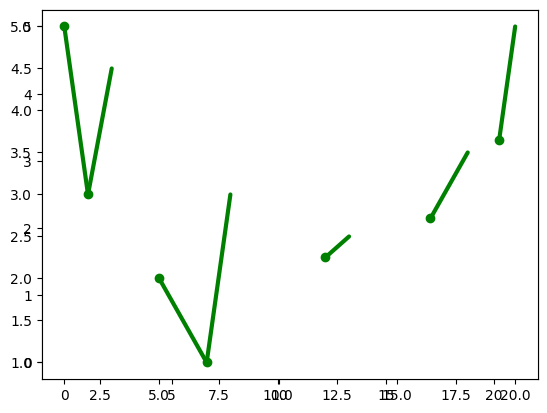

In [17]:
def draw_visibles(terrain):
  polygon = shapely.geometry.Polygon(terrain.vertices_coords)
  fig = plt.figure()
  plt.plot(*polygon.exterior.xy)
  for viewpoint in terrain.viewpoints_coords:
    plt.plot(viewpoint[0],viewpoint[1] - 0.1,'ro')
  ax = fig.add_subplot(111)
  for vis in terrain.visibles:
    if isinstance(vis, shapely.geometry.point.Point):
      plt.plot(vis.x,vis.y,'go')
    if isinstance(vis, shapely.geometry.linestring.LineString):
      # Convert the LineString coordinates to a NumPy array and transpose for plotting
      ax.plot(*np.array(vis.coords).T, color='green', linewidth=3, solid_capstyle='round')
draw_visibles(terrain)